**Scatter plots that communicate**

A scatter plot function that where the meanings of marker size and marker color are communicated in the plot legend. In addition to points on the x and y axis, one represent one variable with size (e.g. a continuous variable) while and color can represent a categorical variable.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def g_scatter(df, x, y, size, size_legend_title, color, ax):
    
    # Make a "sizes" variable and add it to the dataframe. It will be removed at the end of the function.
    marker_size = df[size]
    sz_max_marker = 100
    df['sizes_g_scatter'] = (1 + sz_max_marker * ((marker_size-marker_size.min()))) / (marker_size.max() - marker_size.min())

    # Create a plot as an underlayer, serving as a proxy for the legend for marker size.
    num_legend_points = 5
    # Theoretical, ideal legend points, distributed throughout the size range of the sized variable.
    legend_points_ideal = np.linspace(marker_size.min(),
                                     marker_size.max(),
                                     num_legend_points)
    # Dense list comprehension to get the closest values to the legend_points_ideal
    legend_points_data = [(df[size].iloc[(df[size] - x).abs().argsort().iloc[0]]) for x in legend_points_ideal]

    # Find the rows and make a placeholder dataframe;
    df_temp = df[df[size].isin(legend_points_data)]
    df_temp2 = df_temp.sort_values(by='sizes_g_scatter')   # sort by size

    # Plot data as an underlayer for the purposes of generating a legend
    for i, data in df_temp2.iterrows():
        # In this underlayer, the plot points are set to white so it's not seen (same as the background)
        ax.scatter(data[x], data[y], s=(data['sizes_g_scatter']), c='w', label= "%.0f" % data[size])
    # Place the legend which should only be for the underlaying plot
    first_legend = ax.legend(title=size_legend_title, loc='upper left',
                             fontsize=8, bbox_to_anchor=(1, 1), borderaxespad=1.)
    # Manually set the colors of the marker legends to black (the legend points would have been white or non-visible)
    for i in range(len(first_legend.legendHandles)):
         first_legend.legendHandles[i].set_color('black')
    # Add first legend manually to the current Axes.
    plt.gca().add_artist(first_legend)

    # Plot the data and this time make it visible.
    for i, data in enumerate(df[color].unique()):
        df_temp = df[df[color]==data]
        ax.scatter(x=df_temp[x], y=df_temp[y], s=df_temp['sizes_g_scatter'], c=colors[i], label=None)
    # Use mpatches to add second legend with colors of the groups.
    import matplotlib.patches as mpatches
    groups = df[color].unique().tolist()
    group_patches = list()
    for i,data in enumerate(groups):
        group_patches.append(mpatches.Patch(color=colors[i], label=data))

    # Changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend
    ax.legend(handles=group_patches, title='group', loc='upper left',
              bbox_to_anchor=(1, 0.7), handlelength=1, borderaxespad=1.)

    ax.set_xlabel(x)
    ax.set_ylabel(y)

Example of usage

In [30]:
# Create example dataframe  

m = 50     

# Regression features
uniform_dist = np.arange(0, m)
gaussian_dist = np.random.normal(loc=0, scale=100, size=m)
neg_binomial_dist = np.random.negative_binomial(2, 0.1, size=m)

#  Groups
k = 5
group_size = round(m/k)
groups = (['group 1']*group_size + ['group 2']*group_size
          + ['group 3']*group_size + ['group 4']*group_size
          + ['group 5']*group_size)

df = pd.DataFrame({'uniform': uniform_dist,
                   'gaussian': gaussian_dist,
                   'neg_binomial': neg_binomial_dist,
                   'groups': groups})

In [20]:
df.head()

,gaussian,groups,neg_binomial,uniform
0,102.884706,group 1,2,0
1,-7.559555,group 1,29,1
2,-187.661290,group 1,25,2
3,43.511327,group 1,4,3
4,3.283800,group 1,15,4


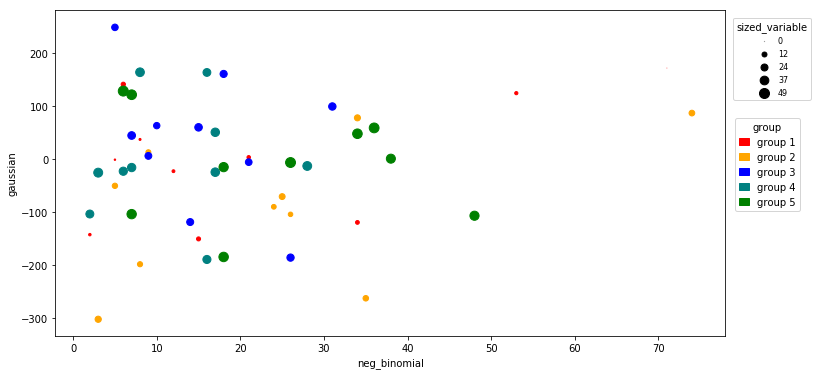

In [32]:
f, ax1 = plt.subplots(1, 1, figsize=(12,6))
colors = ['red', 'orange', 'blue', 'teal', 'green']   # Define colors that represent the groups

feature_x = 'neg_binomial'
feature_y = 'gaussian'

g_scatter(df, feature_x, feature_y,
          size='uniform',
          size_legend_title='sized_variable',
          color='groups', ax=ax1)

## The commands below can be tweaked depending on what you are looking to show. 
# plt.gca().set_aspect('auto', adjustable='box')   
# plt.tight_layout()